# Quickstart

***for Connectivity-based Hopfield Neural Networks (CHNNs)***

- **Part 1**: The quickest way to plot and analyze your data on the CHNN projection
- **Part 2**: Build your own CHNN projection

**Imports**

In [4]:
import sys
sys.path.append('..')
import pandas as pd
import seaborn as sns
from connattractor import network, analysis

## Part 1: The quickest way to plot and analyze your data on the CHNN projection

## Part 2: Build your own CHNN projection

### Obtain functional connectivity matrix

Should be a partial correlation matrix, square and symmetric.

Below, we load in an example connectome, derived from study 1 of the manuscript.
Given the high replicability and generalizability of CHNN analyses, the connectome does not have to stem from the analyzed dataset. Similarly to anatomical standrad templates in neuroimaging practice, the supplied example connectome can be considered a standard connectome template.

Users are, nevertheless, encouraged to use dataset-specific connectomes.

#### Let's load in the example connectome

In [6]:
connfile = '../data_in/ex_connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile).iloc[:, 1:]
mtx

,CER6_p,CER7ab,R_CERCR2_p,CER9_v,CER6_a,L_CERCR2_a,CER9_d,CER9_m,CER7b_m,L_CERCR2_p,...,LVISnet_vp,MVISnet_p,MVISnet_av,LVISnet_p,PVISnet_dm,PVISnet_vm,MVISnet_ad,VVISnet_l,LVISnet_DP,VVISnet_m
0,1.000000,0.023502,0.136701,0.008193,0.074264,0.021580,0.170827,0.028969,0.015883,0.130981,...,-0.002248,-0.008683,0.000152,0.035482,0.007705,-0.029055,0.009439,-0.001390,0.009582,0.007318
1,0.023502,1.000000,0.008167,0.024126,0.046648,0.050263,0.010915,0.070042,0.085829,-0.018248,...,0.033791,0.004000,0.011493,0.007582,-0.026080,0.008013,-0.009007,0.009144,0.001391,0.012831
2,0.136701,0.008167,1.000000,0.005056,0.062669,0.028488,0.041643,0.045169,0.112164,0.157129,...,-0.003300,0.016258,-0.011801,-0.001794,-0.000603,0.012350,-0.002757,-0.004949,-0.004858,-0.000633
3,0.008193,0.024126,0.005056,1.000000,-0.020494,-0.008721,-0.004522,0.203525,-0.003757,0.019182,...,0.021645,0.000472,-0.003774,0.003395,-0.032710,-0.015305,0.007360,0.004044,-0.011696,-0.001293
4,0.074264,0.046648,0.062669,-0.020494,1.000000,0.080293,0.024584,0.002491,-0.021720,0.042291,...,-0.020753,0.005295,-0.012844,-0.014833,0.009989,0.024167,-0.005186,-0.016061,0.010920,-0.007650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.029055,0.008013,0.012350,-0.015305,0.024167,-0.007512,0.045950,0.010056,-0.006412,-0.000421,...,0.011186,0.215436,-0.011083,-0.003814,0.163692,1.000000,0.013773,0.049101,-0.028493,0.115196
118,0.009439,-0.009007,-0.002757,0.007360,-0.005186,-0.023476,-0.004195,-0.029927,-0.023948,-0.023841,...,-0.012657,0.258308,0.091981,0.007686,-0.001867,0.013773,1.000000,-0.013407,0.017465,0.032366
119,-0.001390,0.009144,-0.004949,0.004044,-0.016061,0.004057,0.002311,-0.022643,0.001888,-0.007811,...,0.139682,-0.014010,0.077810,0.079338,0.055300,0.049101,-0.013407,1.000000,0.081084,0.162297
120,0.009582,0.001391,-0.004858,-0.011696,0.010920,0.002928,-0.001322,0.004114,-0.006720,-0.008002,...,0.066451,0.001324,-0.001214,0.115287,0.089609,-0.028493,0.017465,0.081084,1.000000,0.000165


#### Now we construct a CHNN and plot the weights

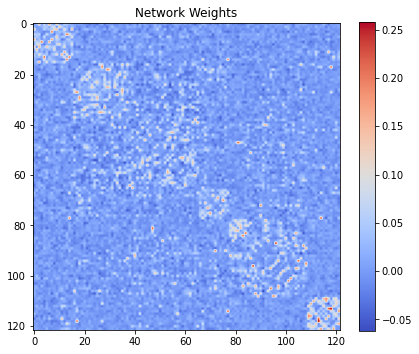

In [9]:
hopnet = network.Hopfield(mtx)
hopnet.plot_weights()

#### Now we run the stochastic relaxation procedure to obtain simulated states
It may take a few seconds...

In [15]:
chnn_state_space = analysis.simulate_activations(mtx.values,
                                            noise_coef=0.37,
                                            num_iter=100000,
                                            beta=0.04,
                                            random_state=42)

100%|██████████| 100000/100000 [00:17<00:00, 5733.25it/s]


#### We create a Hopfield Embedding
Again, a few

In [ ]:
chnn_projection = analysis.create_embeddings(chnn_state_space,
                                             attractor_sample=1000,
                                             random_state=42)

 56%|█████▌    | 558/1000 [00:22<00:18, 23.43it/s]

#### and plot the state space in it